<a href="https://colab.research.google.com/github/Scaglione-Nick/ECGR4106/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.A

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define transformations (normalizing the images)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize with mean and std for CIFAR-10
])

# Download and load CIFAR-10 training and testing datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=16, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=16, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [11]:
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 128)  # Flatten input image
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # Output layer for 10 classes
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)  # Flatten the image
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
# Initialize the model, loss function, and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to evaluate the model performance
def evaluate(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy


Epoch [1/20], Loss: 1.6630, Train Accuracy: 40.95%, Val Accuracy: 44.83%
Epoch [2/20], Loss: 1.4794, Train Accuracy: 47.77%, Val Accuracy: 48.81%
Epoch [3/20], Loss: 1.3903, Train Accuracy: 51.07%, Val Accuracy: 48.75%
Epoch [4/20], Loss: 1.3279, Train Accuracy: 53.17%, Val Accuracy: 50.59%
Epoch [5/20], Loss: 1.2704, Train Accuracy: 55.08%, Val Accuracy: 49.48%
Epoch [6/20], Loss: 1.2273, Train Accuracy: 56.63%, Val Accuracy: 50.88%
Epoch [7/20], Loss: 1.1845, Train Accuracy: 58.02%, Val Accuracy: 51.41%
Epoch [8/20], Loss: 1.1495, Train Accuracy: 59.10%, Val Accuracy: 50.30%
Epoch [9/20], Loss: 1.1164, Train Accuracy: 60.28%, Val Accuracy: 51.26%
Epoch [10/20], Loss: 1.0819, Train Accuracy: 61.62%, Val Accuracy: 51.05%
Epoch [11/20], Loss: 1.0597, Train Accuracy: 62.45%, Val Accuracy: 50.94%
Epoch [12/20], Loss: 1.0279, Train Accuracy: 63.34%, Val Accuracy: 50.55%
Epoch [13/20], Loss: 0.9999, Train Accuracy: 64.47%, Val Accuracy: 50.88%
Epoch [14/20], Loss: 0.9826, Train Accuracy: 64

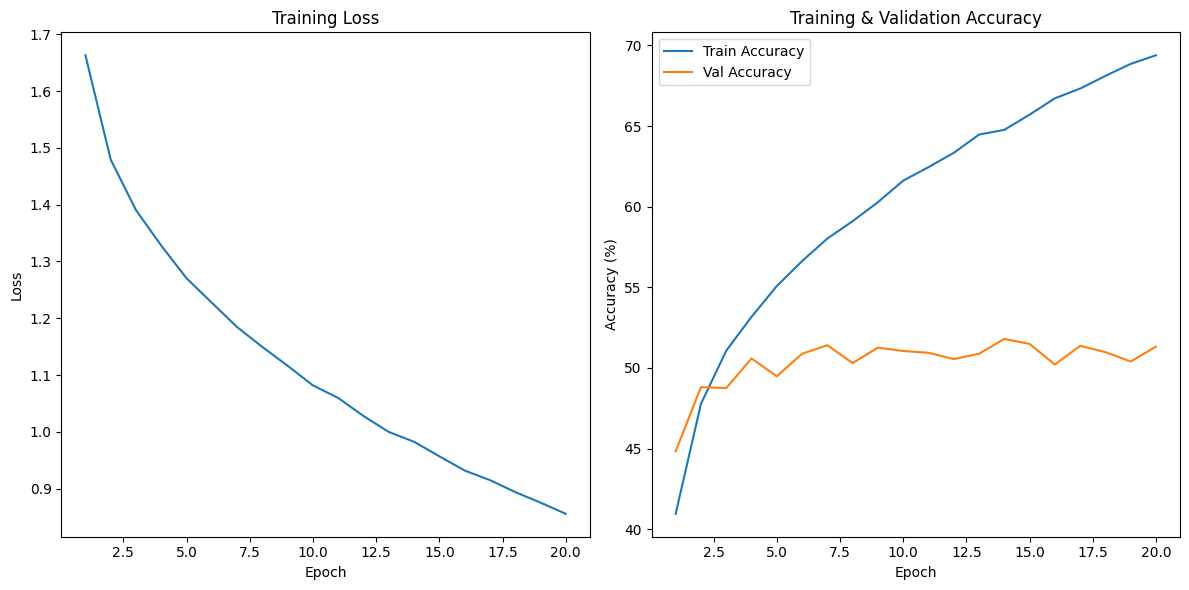

In [12]:
import matplotlib.pyplot as plt

num_epochs = 20
train_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(trainloader))
    train_accuracies.append(100 * correct / total)

    # Evaluate validation accuracy
    val_accuracy = evaluate(model, testloader)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}, Train Accuracy: {100 * correct/total:.2f}%, Val Accuracy: {val_accuracy:.2f}%')

# Plot training loss and accuracy
plt.figure(figsize=(12, 6))

# Training loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

# Training & Validation accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


The model seems to be overfitting to a large degree

              precision    recall  f1-score   support

           0       0.54      0.59      0.57      1000
           1       0.66      0.60      0.63      1000
           2       0.41      0.38      0.39      1000
           3       0.37      0.30      0.33      1000
           4       0.42      0.49      0.45      1000
           5       0.41      0.44      0.43      1000
           6       0.54      0.58      0.56      1000
           7       0.57      0.54      0.56      1000
           8       0.60      0.69      0.64      1000
           9       0.61      0.53      0.57      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000



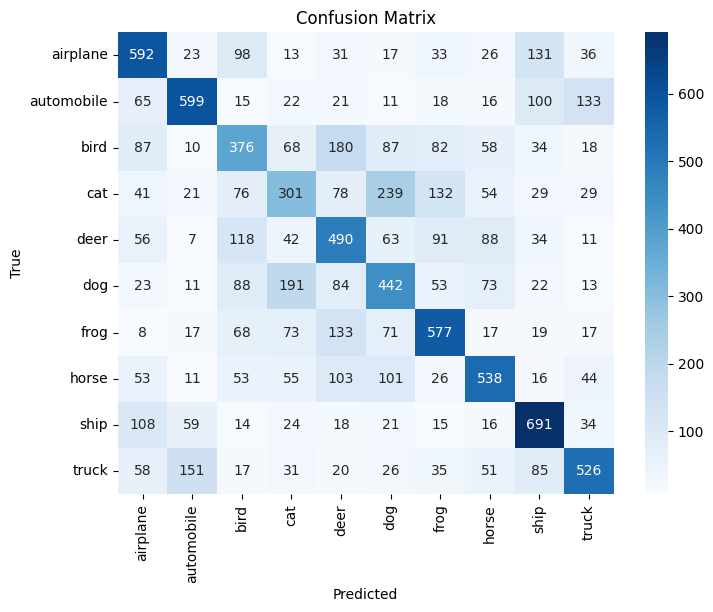

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get all predictions and true labels
all_preds = []
all_labels = []

model.eval()  # Set model to evaluation mode
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

# Generate classification report
print(classification_report(all_labels, all_preds))

# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=trainset.classes, yticklabels=trainset.classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

1.B


In [14]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 256)  # Flatten input image
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)  # Output layer for 10 classes
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)  # Flatten the image
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x
# Initialize the model, loss function, and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch [1/20], Loss: 1.6747, Train Accuracy: 40.44%, Val Accuracy: 46.15%
Epoch [2/20], Loss: 1.4813, Train Accuracy: 47.57%, Val Accuracy: 47.56%
Epoch [3/20], Loss: 1.3840, Train Accuracy: 51.04%, Val Accuracy: 49.07%
Epoch [4/20], Loss: 1.3100, Train Accuracy: 53.74%, Val Accuracy: 50.25%
Epoch [5/20], Loss: 1.2483, Train Accuracy: 55.87%, Val Accuracy: 50.98%
Epoch [6/20], Loss: 1.1907, Train Accuracy: 58.06%, Val Accuracy: 50.87%
Epoch [7/20], Loss: 1.1425, Train Accuracy: 60.08%, Val Accuracy: 50.61%
Epoch [8/20], Loss: 1.0979, Train Accuracy: 60.98%, Val Accuracy: 52.61%
Epoch [9/20], Loss: 1.0487, Train Accuracy: 62.70%, Val Accuracy: 52.44%
Epoch [10/20], Loss: 1.0099, Train Accuracy: 64.17%, Val Accuracy: 52.06%
Epoch [11/20], Loss: 0.9781, Train Accuracy: 65.47%, Val Accuracy: 52.20%
Epoch [12/20], Loss: 0.9375, Train Accuracy: 66.66%, Val Accuracy: 51.90%
Epoch [13/20], Loss: 0.9078, Train Accuracy: 67.74%, Val Accuracy: 51.82%
Epoch [14/20], Loss: 0.8721, Train Accuracy: 68

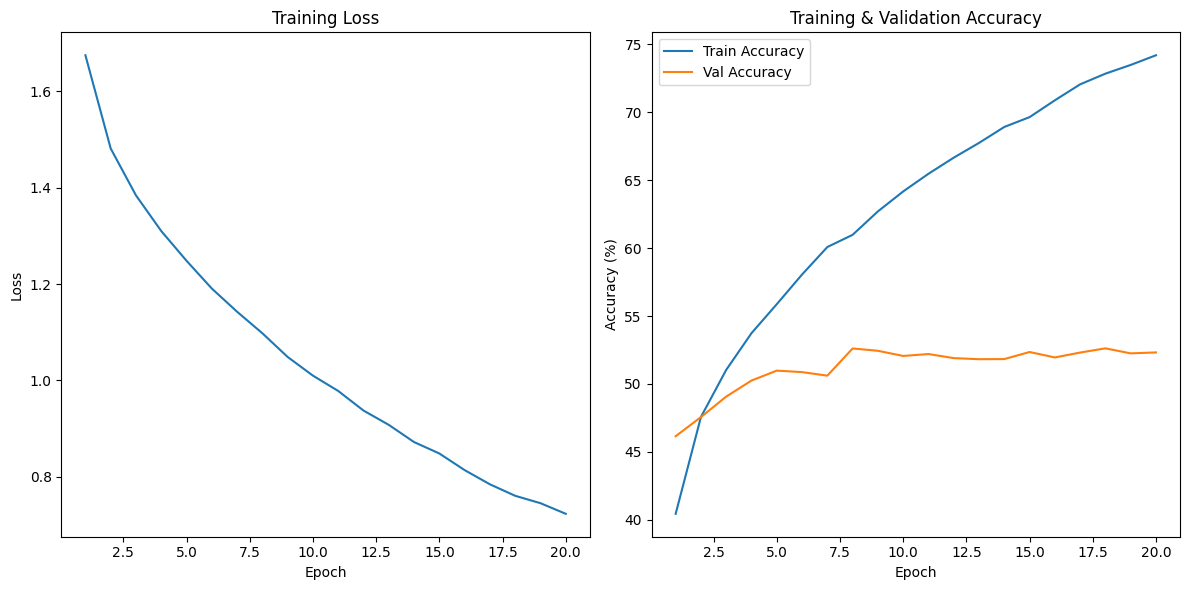

In [15]:
train_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(trainloader))
    train_accuracies.append(100 * correct / total)

    # Evaluate validation accuracy
    val_accuracy = evaluate(model, testloader)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}, Train Accuracy: {100 * correct/total:.2f}%, Val Accuracy: {val_accuracy:.2f}%')
# Plot training loss and accuracy
plt.figure(figsize=(12, 6))

# Training loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

# Training & Validation accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

there is still overfitting, could be fixed by features like dropout

2.a

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/ECGR4105/Datasets/Housing.csv'

housing = pd.DataFrame(pd.read_csv(file_path))
housing= housing.drop(columns=['prefarea','furnishingstatus','mainroad','guestroom','basement','hotwaterheating', 'airconditioning'])
X = housing.drop(columns=['price'])
y = housing['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
# Adding a second hidden layer (with 32 neurons, ReLU activation)
model.add(Dense(32, activation='relu'))
# Adding the output layer (1 neuron for regression)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 25649620189184.0000 - val_loss: 30129988304896.0000
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25227297816576.0000 - val_loss: 30129977819136.0000
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25281765048320.0000 - val_loss: 30129967333376.0000
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25979133100032.0000 - val_loss: 30129948459008.0000
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24731130527744.0000 - val_loss: 30129919098880.0000
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25114049511424.0000 - val_loss: 30129883447296.0000
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26206382587904.0000 - val_loss: 30129831018496.0000
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25953405239296.0000 - val_loss: 30129761812480.0000
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24591625879552.0000 - val_loss: 30129673732096.0000


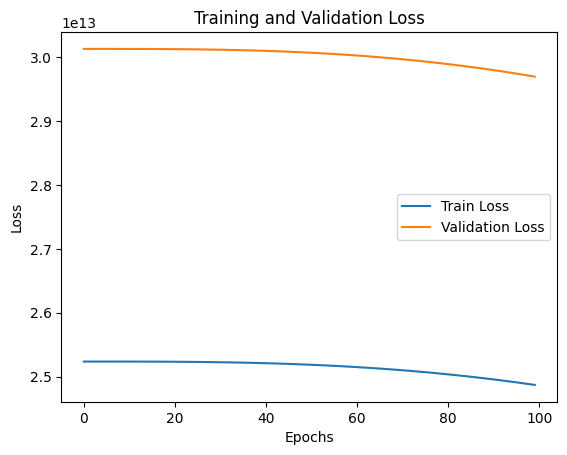

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 28000779239424.0000
Final Validation Loss: 29695586336768.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,493 (29.27 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,996 (19.52 KB)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Regressional 'accuracy' (within ±10.0%): 0.00%


In [13]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
final_loss = model.evaluate(X_val, y_val)
print(f"Final Validation Loss: {final_loss}")
model_summary = model.summary()
tolerance = 0.10  # ±10% error tolerance

# Make predictions
y_pred = model.predict(X_val)

# Calculate absolute percentage error
absolute_percentage_error = np.abs((y_val - y_pred.flatten()) / y_val)

# Calculate accuracy as the proportion of predictions within the tolerance
accuracy = np.mean(absolute_percentage_error <= tolerance)

print(f"Regressional 'accuracy' (within ±{tolerance*100}%): {accuracy * 100:.2f}%")

2.B


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 24852645806080.0000 - val_loss: 30129988304896.0000
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 26190127562752.0000 - val_loss: 30129975721984.0000
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24986467172352.0000 - val_loss: 30129963139072.0000
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24003892740096.0000 - val_loss: 30129948459008.0000
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24807454277632.0000 - val_loss: 30129925390336.0000
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25058013609984.0000 - val_loss: 30129891835904.0000
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25023452545024.0000 - val_loss: 30129849892864.0000
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23982852014080.0000 - val_loss: 30129791172608.0000
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24252138913792.0000 - val_loss: 30129717772288.0000
Epoch 10/10

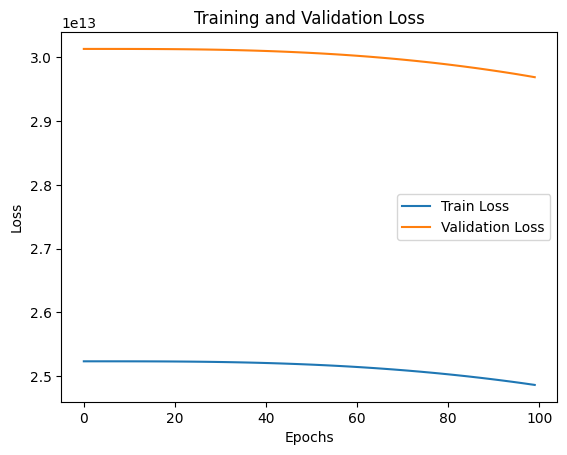

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 27993181257728.0000
Final Validation Loss (MSE): 29686981722112.0
Regressional 'accuracy' (within ±10.0%): 0.00%


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,493 (29.27 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,996 (19.52 KB)

In [19]:
housing = pd.get_dummies(housing, drop_first=True)
X = housing.drop(columns=['price'])  # Replace 'Price' with actual column name
y = housing['price']  # Replace 'Price' with actual column name
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
final_loss = model.evaluate(X_val, y_val)
print(f"Final Validation Loss (MSE): {final_loss}")
tolerance = 0.10  # ±10% error tolerance
absolute_percentage_error = np.abs((y_val - y_pred.flatten()) / y_val)
accuracy = np.mean(absolute_percentage_error <= tolerance)
print(f"Regressional 'accuracy' (within ±{tolerance*100}%): {accuracy * 100:.2f}%")
model_summary = model.summary()

2.C

Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 27076176379904.0000 - val_loss: 30129988304896.0000
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 26642755878912.0000 - val_loss: 30129973624832.0000
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 26184765145088.0000 - val_loss: 30129935876096.0000
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 24647229767680.0000 - val_loss: 30129849892864.0000
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 24729824002048.0000 - val_loss: 30129667440640.0000
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 24981845049344.0000 - val_loss: 30129283661824.0000
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 24741102485504.0000 - val_loss: 30128576921600.0000
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 26241753153536.0000 - val_loss: 30127331213312.0000
Epoch 9/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 25645792886784.0000 - val_loss: 301253263360

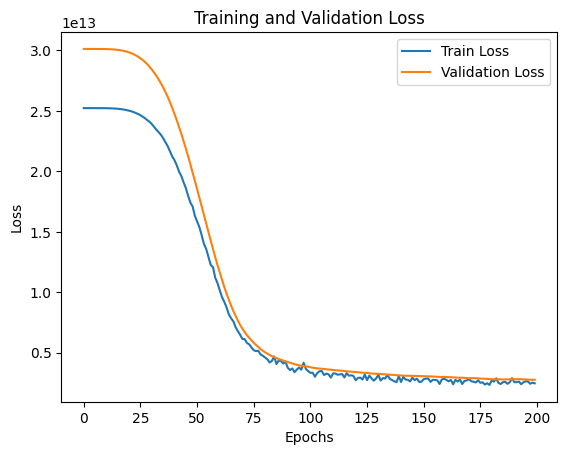

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2644347191296.0000 
Final Validation Loss (MSE): 2760949366784.0
Regressional 'accuracy' (within ±10.0%): 0.00%


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,413 (130.52 KB)

 Trainable params: 11,137 (43.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,276 (87.02 KB)

In [22]:
model = Sequential()
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout
# Adding more hidden layers and neurons
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))  # First hidden layer with L2 regularization
model.add(Dropout(0.3))  # Dropout to prevent overfitting

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # Second hidden layer with L2 regularization
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))  # Third hidden layer
model.add(Dropout(0.3))

# Output layer (Regression task)
model.add(Dense(1))  # Output layer for regression
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), verbose=1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
final_loss = model.evaluate(X_val, y_val)
print(f"Final Validation Loss (MSE): {final_loss}")
tolerance = 0.10  # ±10% error tolerance
absolute_percentage_error = np.abs((y_val - y_pred.flatten()) / y_val)
accuracy = np.mean(absolute_percentage_error <= tolerance)
print(f"Regressional 'accuracy' (within ±{tolerance*100}%): {accuracy * 100:.2f}%")
model_summary = model.summary()